In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
# use iris and get only petal width and sepal length
iris = load_iris()
sepal_length = iris.data[:, 0]
target = iris.target

is_virginica_dict = {0: 0, 1: 0, 2: 1}
is_virginica = np.array([is_virginica_dict[i] for i in target])

species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_name = np.array([species_dict[i] for i in target])

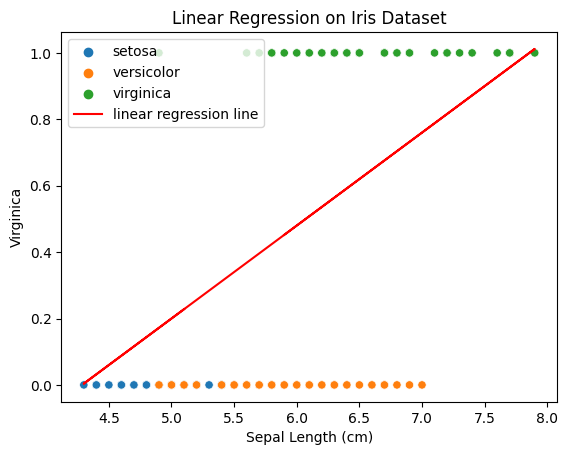

In [22]:
random_regression_line = [-1.2 + 0.28 * x for x in sepal_length]
sns.scatterplot(x=sepal_length, y=is_virginica, hue=species_name)
plt.plot(sepal_length, random_regression_line, color='red', label="linear regression line")
plt.title('Linear Regression on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Virginica')
plt.legend()
plt.show()

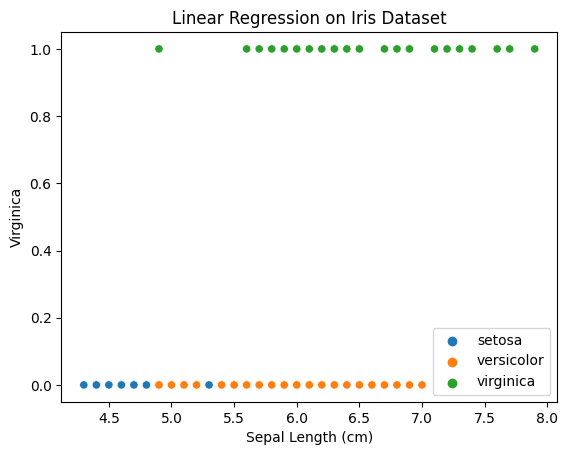

In [23]:
random_regression_line = [-1.2 + 0.28 * x for x in sepal_length]
sns.scatterplot(x=sepal_length, y=is_virginica, hue=species_name)
plt.title('Linear Regression on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Virginica')
plt.legend()
plt.show()

In [17]:
def accuracy(y_pred, y):
    return np.sum(y_pred == y) / len(y)

def sigmoid(x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)
    
def linear_function(intercept, coefficient, x):
    return intercept + coefficient * x

def threshold(x):
    return np.where(x > 0.5, 1, 0)

def gradient_descent(x, y, epochs, alpha = 0.01):
    intercept, coefficient = -1.2, 0.28

    for _ in range(epochs):
        y_pred = np.array(
            [
                sigmoid(
                    linear_function(intercept, coefficient, i)
                ) for i in x
            ]
        )
        intercept = intercept - alpha * np.sum(y_pred - y) / len(y)
        coefficient = coefficient - alpha * np.sum((y_pred - y) * x) / len(y)

    return intercept, coefficient

In [18]:
intercept, coefficient = gradient_descent(sepal_length, is_virginica, 100000)
predicted_value = np.array([sigmoid(linear_function(intercept, coefficient, i)) for i in sepal_length])
corrected_prediction = threshold(predicted_value)

print('accuracy: ', accuracy(corrected_prediction, is_virginica))
print('intercept: ', intercept)
print('coefficient: ', coefficient)

accuracy:  0.8
intercept:  -13.004847396222699
coefficient:  2.0547824850027654


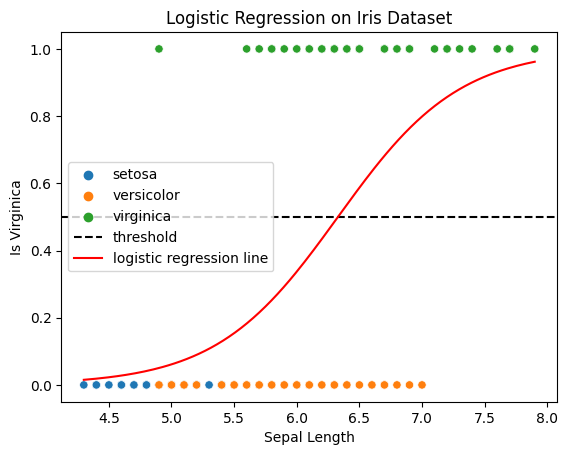

In [19]:
x_values = np.linspace(sepal_length.min(), sepal_length.max(), len(sepal_length))
y_values = sigmoid(linear_function(intercept, coefficient, x_values))

sns.scatterplot(
    x=sepal_length,
    y=is_virginica,
    hue=species_name
)
plt.axhline(y=0.5, color='black', linestyle='--', label='threshold')
plt.plot(x_values, y_values, color='red', label='logistic regression line')
plt.title('Logistic Regression on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Is Virginica')
plt.legend()
plt.show()